In [1]:
!pip install xgboost

In [2]:
### IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
### LOADING THE DATASET
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### EXPLORATORY DATA ANALYSIS

In [4]:
### 1. REMOVING THE UNNECESSARY COLUMN
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
### 2. CHECKING FOR MISSING VALUES
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
### 3. GETTING THE SUMMARY STATISTICS
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
### 4. CHECKING FOR DUPLICATE VALUES
df.duplicated().sum()

0

In [8]:
### 5. CHECKING THE DATATYPES FOR EACH COLUMN BEFORE PREPROCESSING
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

### DATA VISUALISATIONS

<Figure size 1200x800 with 0 Axes>

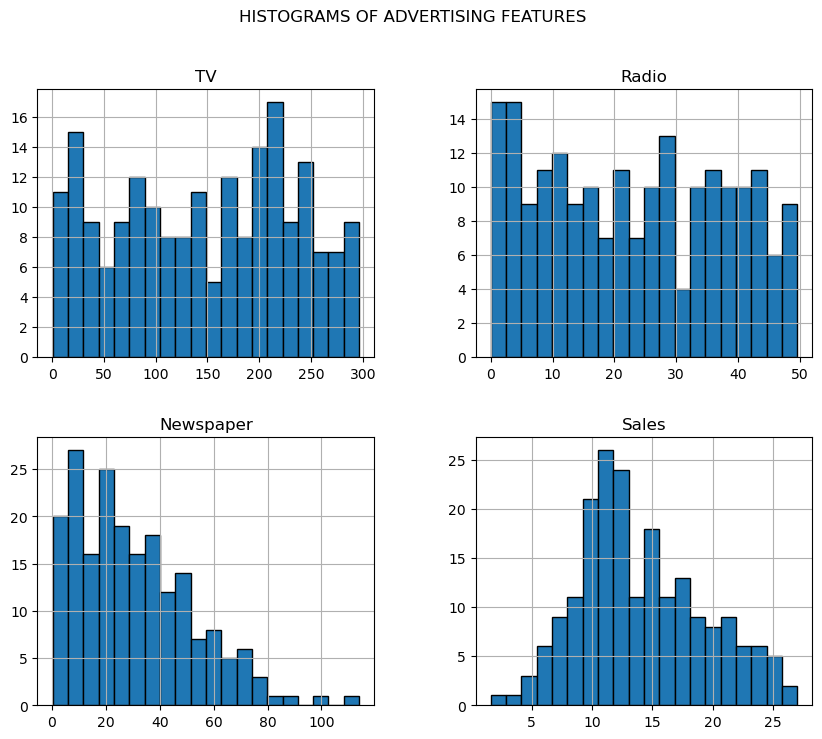

In [9]:
### a. HISTOGRAMS FOR EACH FEATURE
plt.figure(figsize=(12, 8))
df.hist(bins=20, edgecolor='black', figsize=(10, 8))
plt.suptitle("HISTOGRAMS OF ADVERTISING FEATURES")
plt.show()

#### Histograms can help us understand the spread of each feature and check if any transformations (e.g., 
#### log transformations) are needed for skewed features.

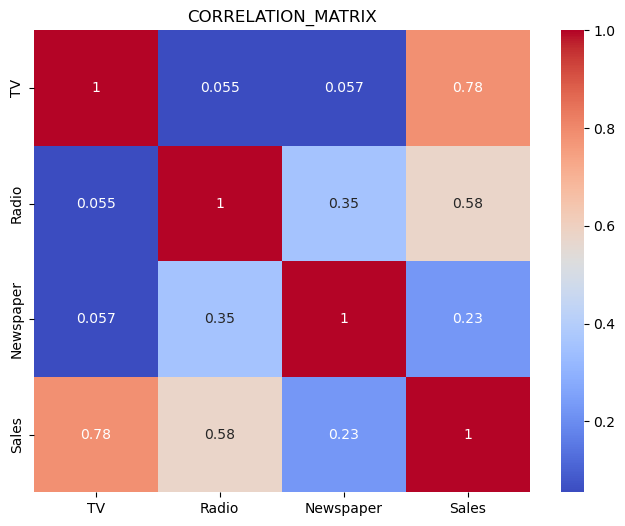

In [10]:
### b. CORRELATION MATRIX
corr_mat = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title("CORRELATION_MATRIX")
plt.show()

#### From the correlation matrix, we can observe that feature TV is strongly correlated with the target variable 
#### (Sales), followed by Radio. Strong correlation indicate that TV and Radio are good predictors of sales.



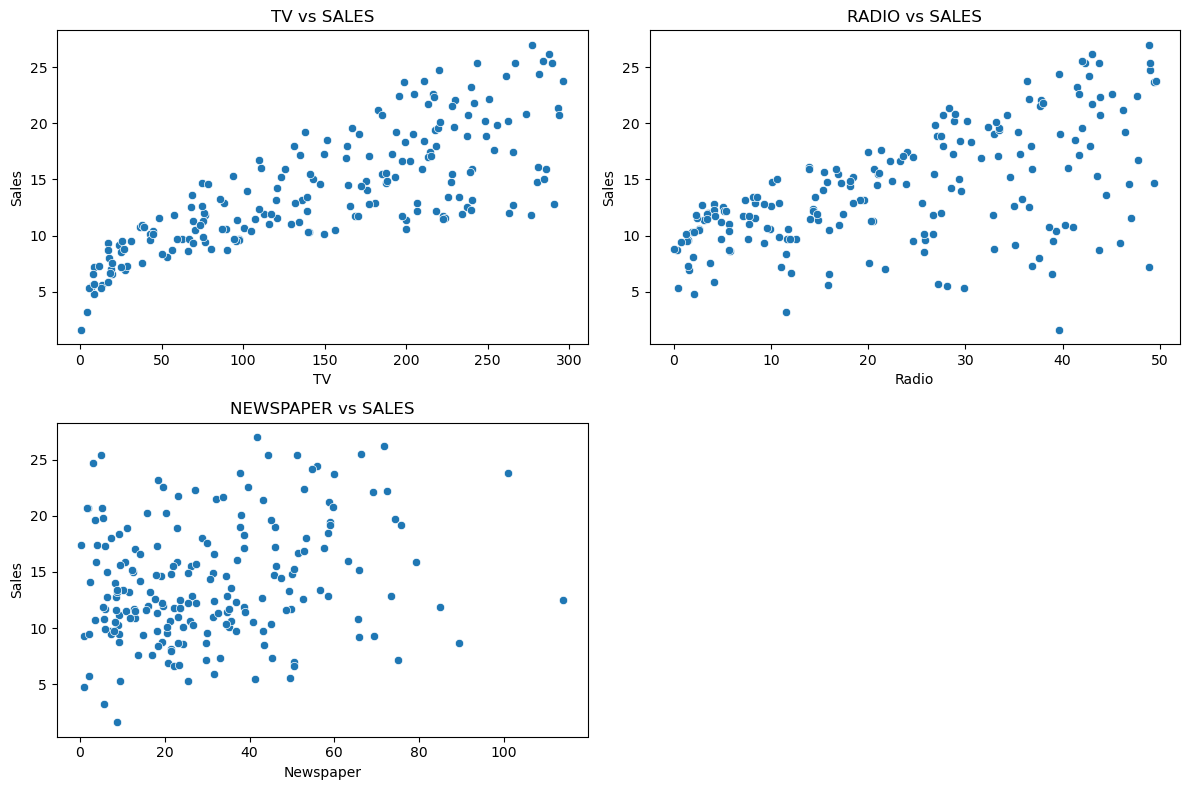

In [11]:
### c. SCATTER PLOT
plt.figure(figsize=(12, 8))

## TV vs SALES
plt.subplot(2, 2, 1)
sns.scatterplot(x=df['TV'], y=df['Sales'])
plt.title('TV vs SALES')

## RADIO vs SALES
plt.subplot(2, 2, 2)
sns.scatterplot(x=df['Radio'], y=df['Sales'])
plt.title('RADIO vs SALES')

## NEWSPAPER vs SALES
plt.subplot(2, 2, 3)
sns.scatterplot(x=df['Newspaper'], y=df['Sales'])
plt.title('NEWSPAPER vs SALES')

plt.tight_layout()
plt.show()

#### From this Scatter plot, we can state that TV and RADIO are having linear relationship with the Sales.

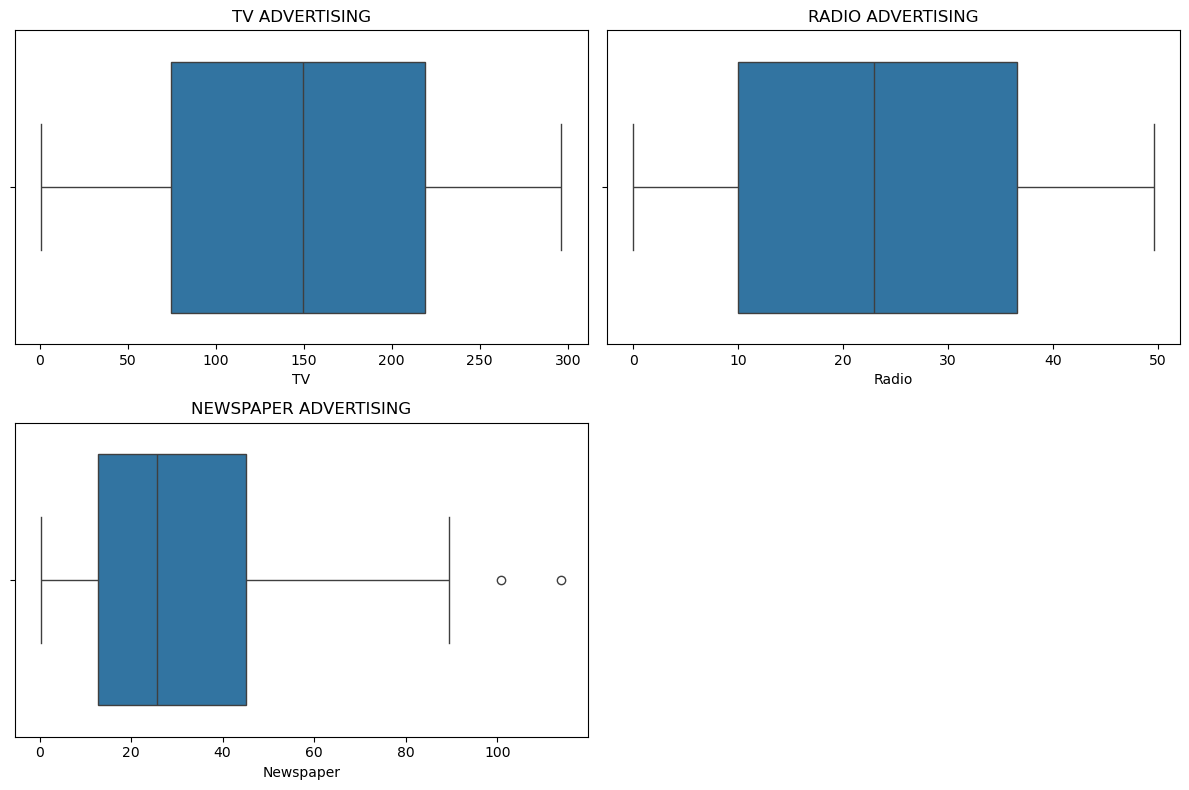

In [12]:
### d. BOXPLOT - OUTLIER DETECTION
plt.figure(figsize=(12, 8))

## BOXPLOT FOR TV
plt.subplot(2, 2, 1)
sns.boxplot(x=df['TV'])
plt.title('TV ADVERTISING')

## BOXPLOT FOR RADIO
plt.subplot(2, 2, 2)
sns.boxplot(x=df['Radio'])
plt.title('RADIO ADVERTISING')

## BOXPLOT FOR NEWSPAPER
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Newspaper'])
plt.title('NEWSPAPER ADVERTISING')

plt.tight_layout()
plt.show()

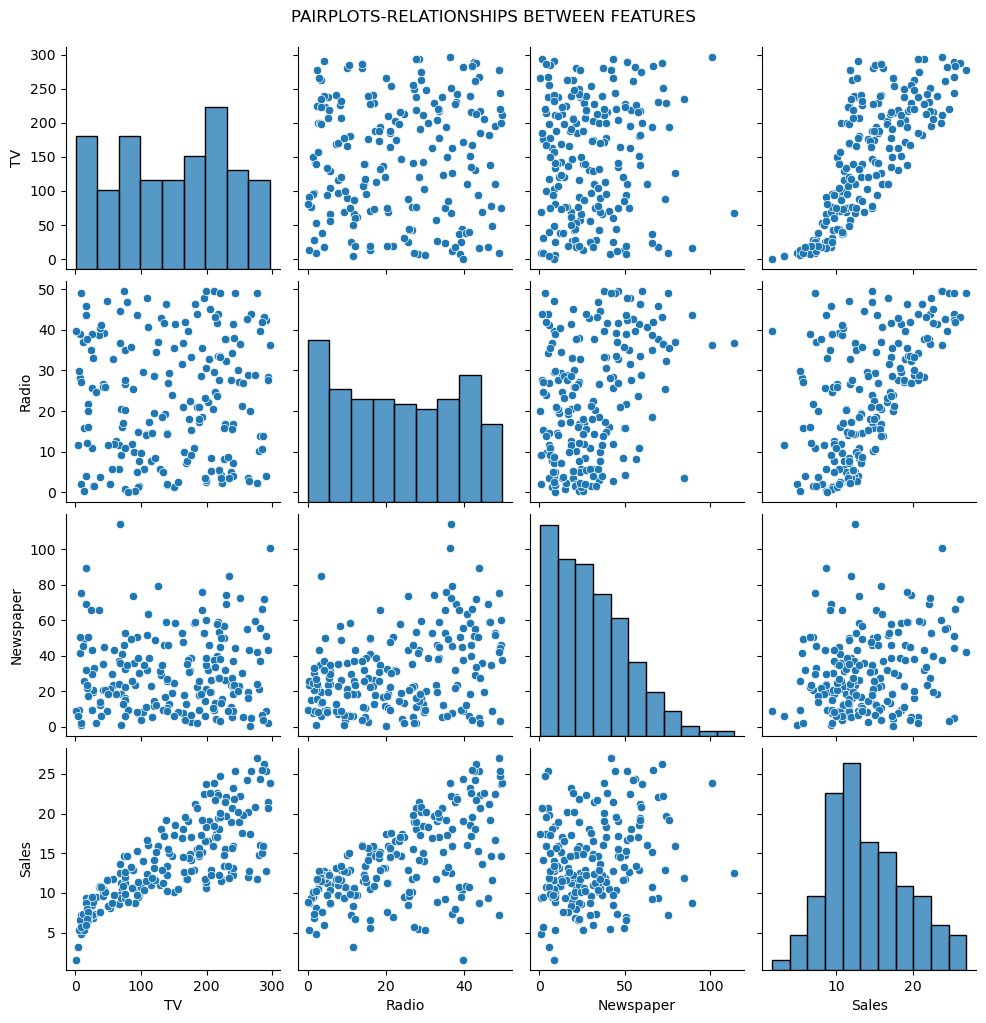

In [13]:
### e. PAIR PLOTS - RELATIONSHIP BETWEEN ALL THE FEATURES INCLUDING THE TARGET VARIABLE
sns.pairplot(df)
plt.suptitle("PAIRPLOTS-RELATIONSHIPS BETWEEN FEATURES", y=1.02)
plt.show()

### DATA PREPROCESSING

In [14]:
### SPLITTING INTO FEATURES AND TARGET VARIABLES
X = df.iloc[:, 0:3]
y = df.iloc[:, 3]

In [15]:
### SPLITTING INTO TRAIN AND TEST DATASET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [16]:
### FEATURE SCALING 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### MODEL BUILDING

In [17]:
### 1. LINEAR REGRESSION
lr = LinearRegression()


In [18]:
### 2. RIDGE REGRESSION
ridge = Ridge(alpha=1.0)


In [19]:
### 3. LASSO REGRESSION
lasso = Lasso(alpha=0.1)


In [20]:
### 4. ELASTICNET REGRESSION
elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5)  ## alpha controls the regularizatio and l1_ratio between Lasso and Ridge


In [21]:
### 5. DECISION TREE REGRESSION
dt = DecisionTreeRegressor(random_state=42)


In [22]:
### 6. RANDOM FOREST REGRESSION
rf = RandomForestRegressor(random_state = 42)


In [23]:
### 7. SUPPORT VECTOR REGRESSION (SVR)
svr = SVR() 


In [24]:
### 8. K-NEAREST NEIGHBOR REGRESSION (KNN)
knn = KNeighborsRegressor(n_neighbors=5)


In [25]:
### 9. GRADIENT BOOSTING REGRESSION
gbr = GradientBoostingRegressor(random_state=42)


In [26]:
### 10. XGBOOST REGRESSION
xgb_regressor = xgb.XGBRegressor(random_state=42)


### CROSS VALIDATION FOR EACH OF THE MODEL

In [27]:
lr_cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print("LINEAR_REGRESSION_MEAN_CV_MSE:", -lr_cv_scores.mean())


ridge_cv_scores = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print("\nRIDGE_REGRESSION_MEAN_CV_MSE:", -ridge_cv_scores.mean())


lasso_cv_scores = cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print("\nLASSO_REGRESSION_MEAN_CV_MSE:", -lasso_cv_scores.mean())

en_cv_scores = cross_val_score(elasticnet, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print("\nELASTICNET_REGRESSION_MEAN_CV_MSE:", -en_cv_scores.mean())


dt_cv_scores = cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print("\nDECISION_TREE_REGRESSION_MEAN_CV_MSE:", -dt_cv_scores.mean())

rf_cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print("\nRANDOM_FOREST_REGRESSION_MEAN_CV_MSE:", -rf_cv_scores.mean())


svr_cv_scores = cross_val_score(svr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print("\nSUPPORT_VECTOR_REGRESSION_MEAN_CV_MSE:", -svr_cv_scores.mean())

knn_cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print("\nK_NEAREST_NEIGHBOR_REGRESSION_MEAN_CV_MSE:", -knn_cv_scores.mean())


gbr_cv_scores = cross_val_score(gbr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print("\nGRADIENT_BOOSTING_REGRESSION_MEAN_CV_MSE:", -gbr_cv_scores.mean())


xgbr_cv_scores = cross_val_score(xgb_regressor, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print("\nXGBOOST_REGRESSION_MEAN_CV_MSE:", -xgbr_cv_scores.mean())



LINEAR_REGRESSION_MEAN_CV_MSE: 2.9433926025900403

RIDGE_REGRESSION_MEAN_CV_MSE: 2.945615462110152

LASSO_REGRESSION_MEAN_CV_MSE: 2.923665599413529

ELASTICNET_REGRESSION_MEAN_CV_MSE: 7.308845681361182

DECISION_TREE_REGRESSION_MEAN_CV_MSE: 1.4832499999999995

RANDOM_FOREST_REGRESSION_MEAN_CV_MSE: 0.6852777187499994

SUPPORT_VECTOR_REGRESSION_MEAN_CV_MSE: 3.636580684892757

K_NEAREST_NEIGHBOR_REGRESSION_MEAN_CV_MSE: 2.06091

GRADIENT_BOOSTING_REGRESSION_MEAN_CV_MSE: 0.6667051287081023

XGBOOST_REGRESSION_MEAN_CV_MSE: 0.6954335442974947


#### Therefore, the top 3 best performing models are Gradient Boosting Regression, Random Forest Regression 
#### and XGBoost Regression, therefore we fit these 3 models and evaluate their performances on test data.

In [28]:
gbr.fit(X_train_scaled, y_train)

## PREDICTIONS
y_pred_gbr = gbr.predict(X_test_scaled)

## EVALUATIONS
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("GRADIENT_BOOSTING_REGRESSION_MSE:", mse_gbr)
print("\nGRADIENT_BOOSTING_REGRESSION_R2_SCORE:", r2_gbr)

GRADIENT_BOOSTING_REGRESSION_MSE: 0.5321649894213744

GRADIENT_BOOSTING_REGRESSION_R2_SCORE: 0.9831399113283361


In [29]:
rf.fit(X_train_scaled, y_train)

##PREDICTIONS
y_pred_rf = rf.predict(X_test_scaled)

## EVALUATIONS
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("RANDOM_FOREST_REGRESSION_MSE:", mse_rf)
print("\nRANDOM_FOREST_REGRESSION_R2_SCORE:", r2_rf)

RANDOM_FOREST_REGRESSION_MSE: 0.5910253749999989

RANDOM_FOREST_REGRESSION_R2_SCORE: 0.9812750924472915


In [30]:
xgb_regressor.fit(X_train_scaled, y_train)
## PREDICTIONS
y_pred_gbr = gbr.predict(X_test_scaled)

## EVALUATIONS
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("GRADIENT_BOOSTING_REGRESSION_MSE:", mse_gbr)
print("\nGRADIENT_BOOSTING_REGRESSION_R2_SCORE:", r2_gbr)

GRADIENT_BOOSTING_REGRESSION_MSE: 0.5321649894213744

GRADIENT_BOOSTING_REGRESSION_R2_SCORE: 0.9831399113283361


### GRID_SEARCH_CV (FOR MORE ROBUST MODEL)


In [31]:
### DEFINING THE PARAMETERS
gbr_param_grid = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
xgbr_param_grid = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}

In [32]:
### PERFORMING GRID SEARCH FOR EACH OF THE TOP 3 MODELS
gbr_grid_search = GridSearchCV(estimator=gbr, param_grid=gbr_param_grid, cv=5, scoring='neg_mean_squared_error')
gbr_grid_search.fit(X_train_scaled, y_train)

gbr_best_params = gbr_grid_search.best_params_
gbr_best_score = gbr_grid_search.best_score_

print("BEST PARAMETERS FOR GRADIENT BOOSTING:", gbr_best_params)
print("\nBEST CV SCORE FOR GRADIENT BOOSTING:", gbr_best_score)

rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train_scaled, y_train)

rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_

print("\nBEST PARAMETERS FOR RANDOM_FOREST_REGRESSION:", rf_best_params)
print("\nBEST CV SCORE FOR RANDOM_FOREST_REGRESSION:", rf_best_score)


xgbr_grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=xgbr_param_grid, cv=5, scoring='neg_mean_squared_error')
xgbr_grid_search.fit(X_train_scaled, y_train)

xgbr_best_params = xgbr_grid_search.best_params_
xgbr_best_score = xgbr_grid_search.best_score_

print("\nBEST PARAMETERS FOR XGBOOST REGRESSION:", xgbr_best_params)
print("\nBEST CV SCORE FOR XGBOOST REGRESSION:", xgbr_best_score)




BEST PARAMETERS FOR GRADIENT BOOSTING: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

BEST CV SCORE FOR GRADIENT BOOSTING: -0.6667051287081023

BEST PARAMETERS FOR RANDOM_FOREST_REGRESSION: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

BEST CV SCORE FOR RANDOM_FOREST_REGRESSION: -0.6654006515625052

BEST PARAMETERS FOR XGBOOST REGRESSION: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}

BEST CV SCORE FOR XGBOOST REGRESSION: -0.6498283606809745


In [33]:
### FITTING, PREDICTION AND EVALUATION OF THE MODEL XGBOOST AS IT IS THE FINAL BEST MODEL
xgboost_best_model = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=150, random_state=42)
xgboost_best_model.fit(X_train_scaled, y_train)

y_pred = xgboost_best_model.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("XGBOOST - TEST MSE:", mse_test)
print("XGBOOST - TEST R²:", r2_test)



XGBOOST - TEST MSE: 0.7082583234860259
XGBOOST - TEST R²: 0.9775609099174258
